In [28]:
import sys
import os
# Sorry for this code : (
sys.path.append('../')

import numpy as np
import matplotlib
from matplotlib import pyplot as plt


import loader

import importlib
importlib.reload(loader)

parent =  os.path.abspath("../")
path_to_hearts = os.path.join(parent, 'hearts')

COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [16]:
sim_time_minutes = 20
cores = 10
sim_s_to_rl_m = 2 # Worst case scenario
max_buffer_size = 10_000
size_state = 320
size_action = 4
float_size = 8
sampling_frequency = 200

comp_time_minutes = sim_time_minutes * 60 * sim_s_to_rl_m
days = int((comp_time_minutes / 60) // 24)
hours = int((comp_time_minutes / 60) - (days * 24))
minutes = int(comp_time_minutes - (days * 24 * 60 + hours * 60))
seconds = int((comp_time_minutes * 60) - (days * 24 * 3600 + hours * 3600 + minutes * 60))

sim_data_hours = (sim_time_minutes * cores) / 60
tot_hours = comp_time_minutes / 60

samples_per_core = sim_time_minutes * 60 * sampling_frequency 
sampels_total = samples_per_core * cores

mem_total_bytes = (size_state + size_action) * float_size * max_buffer_size * cores
mem_total_GB = mem_total_bytes / 1_000_000_000

t_end = sim_time_minutes * 60 * 1_000

print(f"Total hours: {tot_hours}")
print(f"T_end: {t_end}")
print(f"Comp time: {days}-{hours}:{minutes}:{seconds}")
print(f"Required memory: {mem_total_GB} GB")
print(f"Available data: {sim_data_hours} hours")
print(f"Available samplese: {sampels_total}")

Total hours: 40.0
T_end: 1200000
Comp time: 1-16:0:0
Required memory: 0.2592 GB
Available data: 3.3333333333333335 hours
Available samplese: 2400000


In [10]:
x = 100
%timeit x**2 

KeyboardInterrupt: 

In [ ]:
x = 100
%timeit x * x 

30.2 ns ± 0.881 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


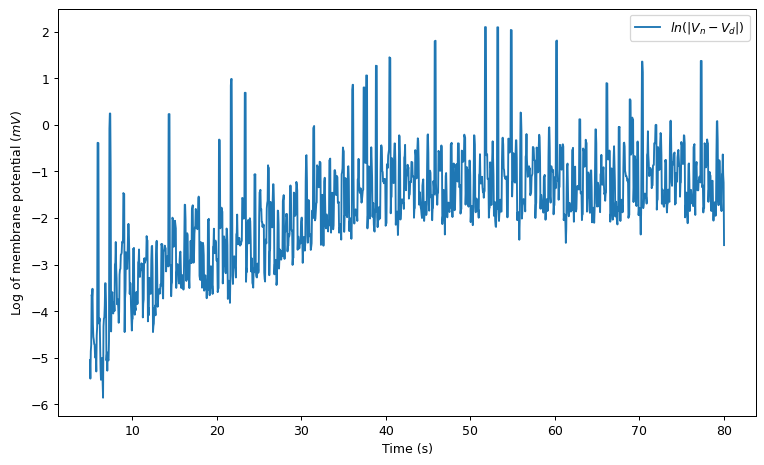

In [14]:
all_states, all_actions, t_start, t_end, par, name = loader.load_experiment(
    "ref_non_disturbed",
    path_to_hearts
)

uProbes = all_states[0]

all_states, all_actions, t_start, t_end, par, name = loader.load_experiment(
    "ref_disturbed",
    path_to_hearts
)

dProbes = all_states[0]

diffs = np.linalg.norm(dProbes - uProbes, axis=1)

N = 3
diffs_mean = np.convolve(diffs, np.ones(N)/N, mode='sane')

fig, ax = plt .subplots(1, 1, figsize=(10, 6), dpi=90)
t = np.linspace(t_start, t_end, num=diffs.size) / 1_000
#plt.plot(t, diffs, label="actual")
ax.plot(t[100:], np.log(diffs_mean[100:]), label="$ln(|V_{n} - V_{d}|)$")
ax.set_ylabel("Log of membrane potential ($mV$)")
ax.set_xlabel("Time (s)")
ax.legend()
plt.savefig("../../Figures/Difference.pdf")

5.485567445252918

(21600, 320)


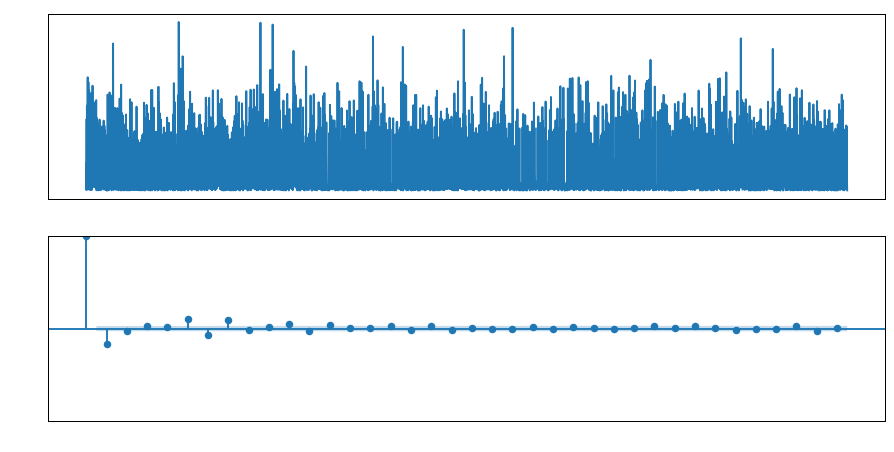

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

all_states, all_actions, t_start, t_end, par, name = loader.load_experiment(
    "peregrine_all",
    path_to_hearts
)



fig, ax = plt.subplots(2, 1, figsize = (12, 6), dpi=90)

states = all_states[0]
actions = all_actions[0]

print(states.shape)

t = np.arange(states.shape[0])
indicies = (t > 0) & (t < 5000)
x = states[indicies, 0]
ax[0].plot(x)
plot_acf(states[indicies, 0], ax[1])
plt.show()


# showcase = states.T
# plt.xlabel("Time (s)", fontsize=12)
# plt.ylabel("$V_m$ (mV)", fontsize=12)
# plt.plot(t[indicies], showcase[0][indicies], label="$s_1$")
# plt.plot(t[indicies], showcase[1][indicies], label="$s_2$")
# plt.plot(t[indicies], showcase[2][indicies], label="$s_3$")
# #plt.plot(t[indicies], showcase[2][indicies])
# #plt.plot(t[indicies], showcase[1][indicies], label="$s_2$")
# plt.legend()
# plt.savefig("../../Figures/ref-signal-example.pdf")

[1.08894717e+08]


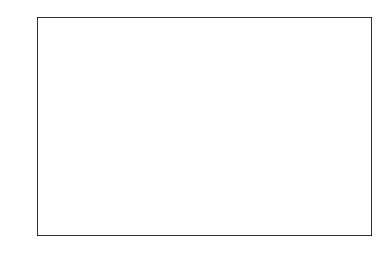

In [ ]:
print(np.correlate(states[:,0], states[:,0]))
plt.plot(np.correlate(states[:,0], states[:,0]))
plt.show()

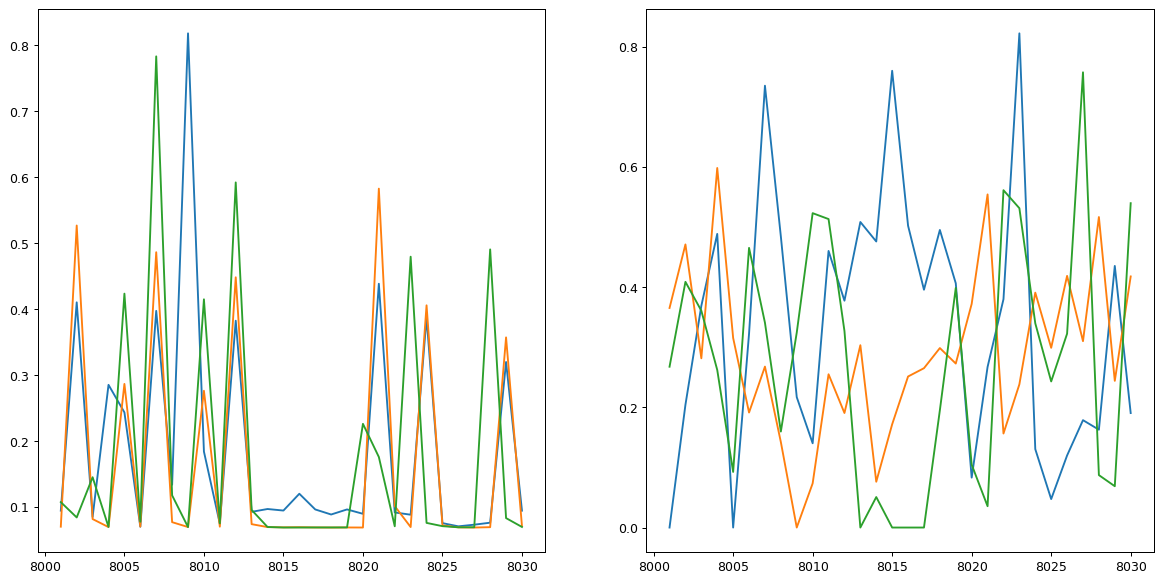

In [ ]:
generator = loader.load_experiment_generator(
    "peregrine_big",
    os.path.abspath(os.path.join("..", 'hearts'))
)

states, actions = next(generator)

s_min, s_max = [-90.0, 50.0]
a_min, a_max = [0.0, 60.0]

s_shape = states.shape
#states = np.reshape(states, (s_shape[0], s_shape[1], 1))
a_shape = actions.shape
#actions = np.reshape(actions, (a_shape[0], a_shape[1], 1))

n_samples = s_shape[0]

states = (states - s_min) / (s_max - s_min)
actions = (actions - a_min) / (a_max - a_min)

fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=90)

ts = np.arange(n_samples)
begin = 8000
window = 30
indicies = (ts > begin) & (ts <= (begin + window)) 

ax[0].plot(ts[indicies], states.T[0][indicies])
ax[0].plot(ts[indicies], states.T[1][indicies])
ax[0].plot(ts[indicies], states.T[2][indicies])

ax[1].plot(ts[indicies], actions.T[0][indicies])
ax[1].plot(ts[indicies], actions.T[1][indicies])
ax[1].plot(ts[indicies], actions.T[2][indicies])

plt.show()

(21600, 8)


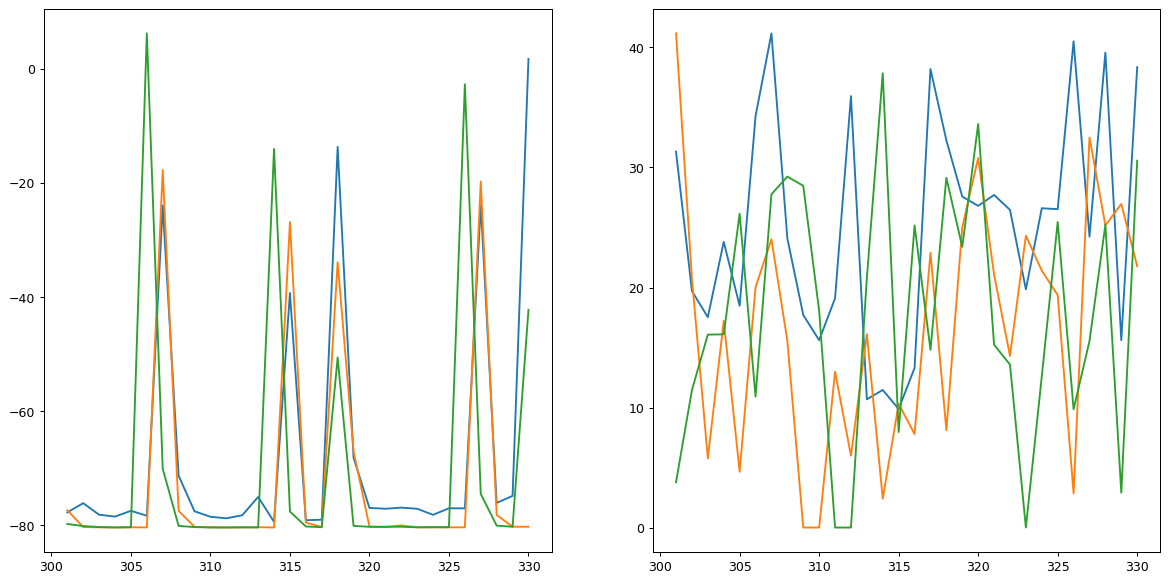

In [ ]:
generator = loader.load_experiment_generator(
    "peregrine_big",
    os.path.abspath(os.path.join("..", 'hearts'))
)

states, actions = next(generator)

fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=90)

n_samples = states.shape[0]
print(states.shape)

ts = np.arange(n_samples)
begin = 300
window = 30
indicies = (ts > begin) & (ts <= (begin + window)) 

ax[0].plot(ts[indicies], states.T[0][indicies])
ax[0].plot(ts[indicies], states.T[1][indicies])
ax[0].plot(ts[indicies], states.T[2][indicies])

ax[1].plot(ts[indicies], actions.T[0][indicies])
ax[1].plot(ts[indicies], actions.T[1][indicies])
ax[1].plot(ts[indicies], actions.T[2][indicies])

In [ ]:
import numpy as np
import scipy.sparse as sp

def pick_random_non_zero_value_indices(avail, n):
    hack = np.min(avail) - 1
    indices = np.array(np.where(avail > hack))
    shuffle_indices = np.arange(indices.shape[1])
    np.random.shuffle(shuffle_indices)

    indices[0,:] = indices[0, shuffle_indices]
    indices[1,:] = indices[0, shuffle_indices]
    
    chosen = []

    for i, j in indices.T:
        if avail[i, j] != 0 and len(chosen) < n:
            chosen.append([i, j])

    if len(chosen) < n:
        raise ValueError("Not enough non-zero elements in the avail matrix")

    return chosen

test = sp.random(6, 6, density=0.5, format="bsr").toarray()
print("MAtrix")
print(test)

rows_i = np.random.choice(
    np.arange(test.shape[0]),
    size=3,
    replace=False
)

test  = test[rows_i,:]
print("Chosen rows")

print(rows_i)
print(test)

indicies = pick_random_non_zero_value_indices(test, 4)
print(indicies)

MAtrix
[[0.9226882  0.         0.65276988 0.         0.30429821 0.        ]
 [0.22896123 0.         0.42691212 0.56089946 0.         0.79113737]
 [0.         0.         0.         0.91138772 0.55934947 0.97962789]
 [0.         0.48170756 0.         0.         0.         0.88760253]
 [0.99531793 0.         0.21676574 0.         0.         0.47794771]
 [0.73432    0.         0.15883174 0.         0.20029853 0.        ]]
Chosen rows
[2 3 5]
[[0.         0.         0.         0.91138772 0.55934947 0.97962789]
 [0.         0.48170756 0.         0.         0.         0.88760253]
 [0.73432    0.         0.15883174 0.         0.20029853 0.        ]]
[[1, 1], [2, 2], [2, 2], [2, 2]]


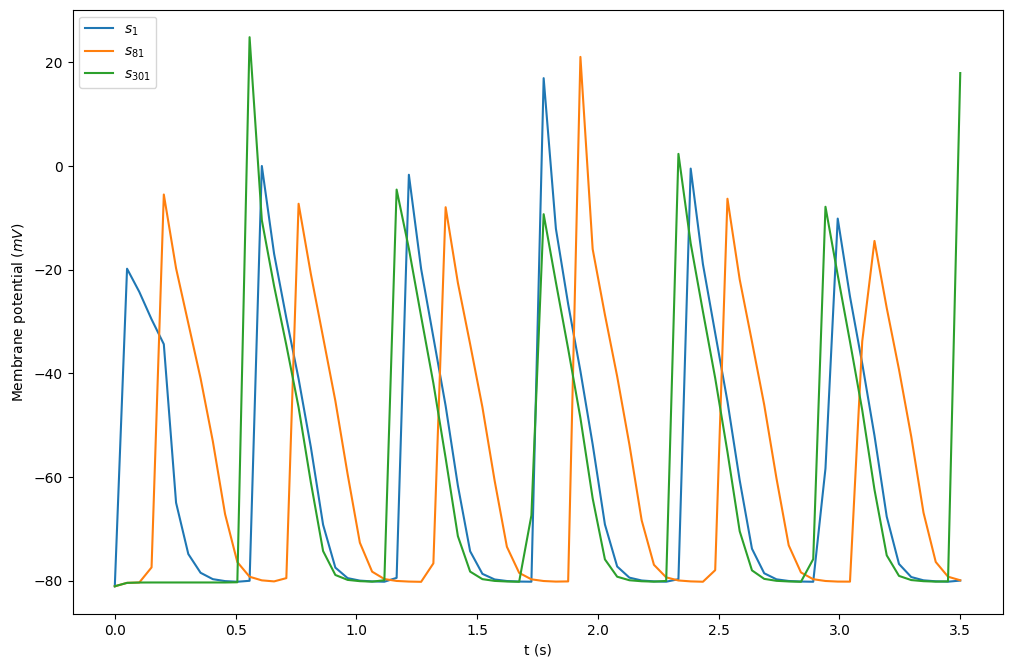

In [27]:
generator = loader.load_experiment_generator(
    "reference_all_100",
    os.path.abspath(os.path.join("..", 'hearts'))
)

states, actions = next(generator)

fig, ax = plt.subplots(1, 1, figsize =(12, 8), dpi = 100)
b = 0
e = 70
T = 1 / (20)
t = np.linspace(b, e, states[b:e,1].shape[0]) * T
ax.plot(t, states[b:e, 1], label="$s_1$")
ax.plot(t, states[b:e, 80], label="$s_{81}$")
ax.plot(t, states[b:e, 300], label="$s_{301}$")
ax.legend()
ax.set_xlabel("t (s)")
ax.set_ylabel("Membrane potential ($mV$)")
plt.savefig("../../Figures/healthy.pdf")

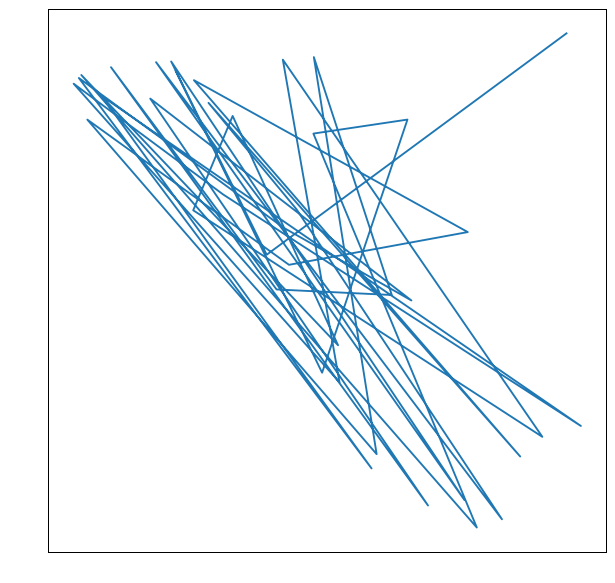

In [ ]:
generator = loader.load_experiment_generator(
    "peregrine_all",
    os.path.abspath(os.path.join("..", 'hearts'))
)

states, actions = next(generator)




s_min, s_max = [-90, 50]
states = (states - s_min) / (s_max - s_min)

u = states - np.mean(states, axis=0)

cov_mat = np.cov(u, rowvar = False)

eival, eivec = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eival)[::-1]
eivec = eivec[:,sorted_index]
eival = eival[sorted_index]

to = 2
M_pca = eivec[:,:to]

ds = np.dot(M_pca.T, u.T).T

showcase = ds[:40,:].T


fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=90)
ax.plot(showcase[0], showcase[1])
plt.show()




In [ ]:
worm = np.load(os.path.join(parent, 'trash', 'Gg.npy'))

np.max(np.abs(np.linalg.eigvals(worm)))



31.39631152173038

(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(21600, 320)
(30, 320)


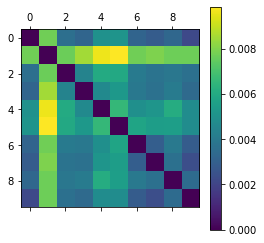

In [29]:
from sklearn.decomposition import PCA

def do_pca(n):
    generator = loader.load_experiment_generator(
        "peregrine_all",
        os.path.abspath(os.path.join("..", 'hearts'))
    )


    pcas = []
    for _ in range(3):

        states, _ = next(generator)

        s_min, s_max = [-90, 50]
        states = (states - s_min) / (s_max - s_min)

        states = states - np.mean(states, axis=0)
        pca = PCA(n_components=n)
        pca.fit(states)
        pcas.append(pca.components_)
        
    return pcas
    
pcas = do_pca(30)
n = len(pcas)
diff = np.ones((n, n))

for i in range(n):
    mat1 = pcas[i]
    for j in range(n):
        mat2 = pcas[j]
        delta = mat1 - mat2
        euclid = np.linalg.norm(delta, axis=1)
        distance = np.mean(euclid)
        diff[i, j] = distance


fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=90)
ax.matshow(diff)
ax.colorbar()
plt.savefig("../../Figures/diff_mat.pdf")
        
        
        

In [ ]:
import pickle
from sklearn.decomposition import PCA

generator = loader.load_experiment_generator(
    "peregrine_all",
    os.path.abspath(os.path.join("..", 'hearts'))
)

states, _ = next(generator)
s_min, s_max = [-90, 50]
states = (states - s_min) / (s_max - s_min)

states = states - np.mean(states, axis=0)
pca = PCA(n_components=3)
lol = pca.fit_transform(states)

print(pca.explained_variance_[0:3])
with open("../trash/pca.pkl", "wb") as f:
    pickle.dump(pca, f)

    with open("../trash/pca.pkl", "rb") as f:
        pca_load = pickle.load(f)

print(pca_load.explained_variance_[0:3])

lol2 = pca_load.transform(states)

print((np.abs(lol2 - lol) < 0.00001).all())


[1.5676262  1.50468213 0.48455212]
[1.5676262  1.50468213 0.48455212]
True


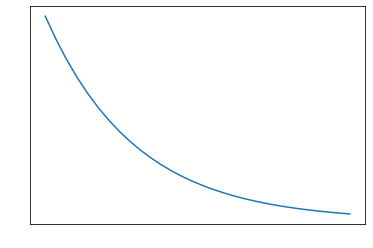

In [ ]:

def np_log(x, base):
    return np.log(x) / np.log(base)

var_penal = np.logspace(1, 0, 30, base=30)
vp_max = np.max(var_penal)
vp_min = np.min(var_penal)
var_penal = (var_penal - vp_min) / (vp_max - vp_min)
plt.plot(var_penal)
plt.show()

In [ ]:
(np.abs(kek - kek2) > 0.000000001).any()

False

In [ ]:
import json
from sklearn.decomposition import PCA

def to_PCA(src, components):
    data = np.load(src)
    if data.ndim > 2:
        data = np.reshape(data, (data.shape[0], -1))
    data = data - np.mean(data, axis=0)

    pca = PCA(n_components=components)
    trajectory = pca.fit_transform(data).T

    x_min, x_max = np.min(trajectory[0]), np.max(trajectory[0])
    trajectory[0] = (trajectory[0] - x_min) / (x_max - x_min)

    y_min, y_max = np.min(trajectory[1]), np.max(trajectory[1])
    trajectory[1] = (trajectory[1] - y_min) / (y_max - y_min) 

    return trajectory




<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
disturbed = to_PCA("../hearts/traj_d/data/states_0_0.npy", 3)

with open("../../../chaotic_visuals/data/disturbed.json", "w") as f:
    json.dump(disturbed.tolist(), f)

In [ ]:
non_disturbed = to_PCA("../hearts/traj_n/data/states_0_0.npy", 3)

with open("../../../chaotic_visuals/data/non_disturbed.json", "w") as f:
    json.dump(non_disturbed.tolist(), f)

In [ ]:
trajectory = to_PCA("../roentgen/video.npy", 3)

with open("../../../chaotic_visuals/data/disturbed.json", "w") as f:
    data = json.dumps(trajectory.tolist())

    f.write(data)

In [ ]:
trajectory = to_PCA("../roentgen/video.npy", 2)

with open("../roentgen/trajectory.js", "w") as f:
    data = json.dumps(trajectory.tolist())

    f.write(f"var trajectory = {data};")


In [ ]:
def test_wo(N, arr):
    res = arr

    for _ in range(N):
        res = res + arr

    return res

def test_w(N, arr):
    res = np.squeeze(arr)

    for _ in range(N):
        res = res + np.squeeze(arr)

    return res

N = 1_000_000
arr = np.random.random((500, 1))

In [ ]:
%timeit test_wo(N, arr)

420 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit test_w(N, arr)

1.07 s ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


NRMSE: 1.3136905111042894
(200,)


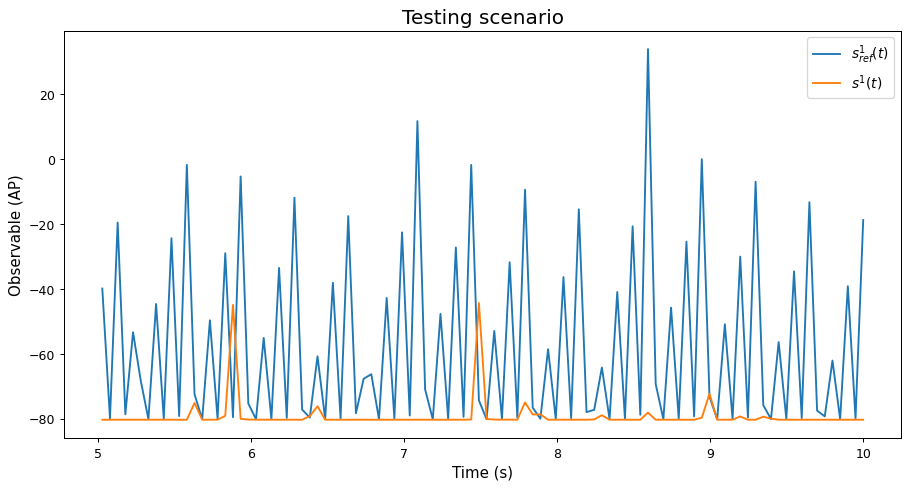

In [58]:
from os.path import join

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi=90)

path = join(os.path.abspath(".."), 'hearts', 'TEST_spatial-35_peregrine_all')
states = np.load(join(path, 'states.npy'))
actions = np.load(join(path, 'actions.npy'))
reference = np.load(join(path, 'reference.npy'))


yhats = states[50:,:].T
ys = reference[50:,:].T

time = np.linspace(0, states.shape[0] / 20, states.shape[0])
delta = np.mean((yhats - ys) * (yhats - ys), axis=1)
variances = np.var(ys, axis=1)
NMSE = delta / variances
NRMSE = np.sqrt(NMSE)
NRMSE = np.mean(NRMSE)

print(f"NRMSE: {NRMSE}")
diff = states - reference
diff = np.linalg.norm(diff, axis=1)
print(diff.shape)
ax.plot(time[100:], reference[100:,1], label="$s_{ref}^{1}(t)$")
ax.plot(time[100:], states[100:,1], label="$s^{1}(t)$")
ax.legend(facecolor='w', labelcolor='black', prop={'size': 11})
ax.set_title(f"Testing scenario", fontsize=16)   
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Observable (AP)", fontsize=12)
plt.savefig("../../Figures/testing.png")

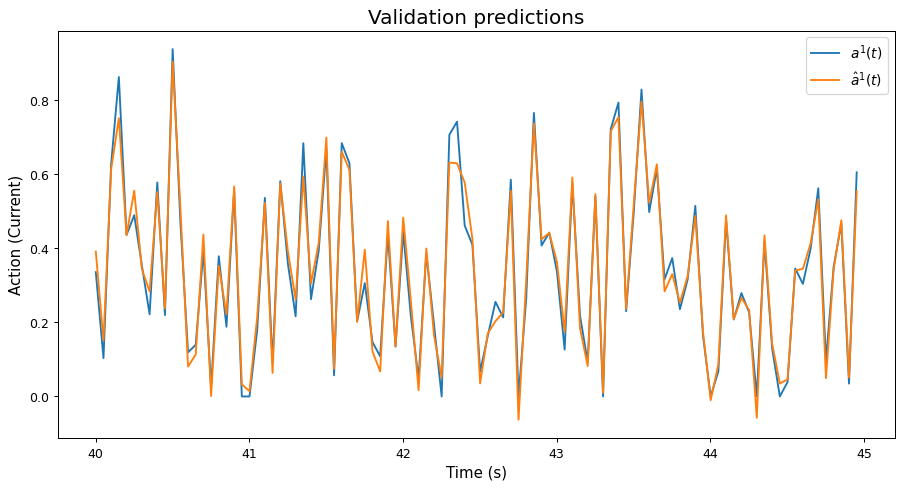

In [56]:


g_core = 0
path = join(os.path.abspath(".."), "doctors", "spatial-36")
y = np.load(join(path, f"y_test_{g_core}.npy"))
yhat = np.load(join(path, f"yhat_test_{g_core}.npy"))
time = np.linspace(0, y.shape[0] / 20, y.shape[0])

fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi=90)

b = 800
e = 900
ax.plot(time[b:e], y[b:e,1], label="$a^{1}(t)$")
ax.plot(time[b:e], yhat[b:e,1], label="$\hat{a}^{1}(t)$")
ax.legend(facecolor='w', labelcolor='black', prop={'size': 11})
ax.set_title(f"Validation predictions", fontsize=16)   
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Action (Current)", fontsize=12)
plt.savefig("../../Figures/validation.png")
#plt.show()
